In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
loan=pd.read_csv("Finalprocessed_loans_2007.csv")

In [4]:
loan.T

0          1          2      \
loan_amnt                             5000.000   2500.000   2400.000   
installment                            162.870     59.830     84.330   
grade                                    2.000      3.000      3.000   
emp_length                              10.000      0.000     10.000   
annual_inc                           24000.000  30000.000  12252.000   
loan_status                              1.000      0.000      1.000   
dti                                     27.650      1.000      8.720   
delinq_2yrs                              0.000      0.000      0.000   
inq_last_6mths                           1.000      5.000      2.000   
open_acc                                 3.000      3.000      2.000   
pub_rec                                  0.000      0.000      0.000   
revol_bal                            13648.000   1687.000   2956.000   
revol_util                               0.837      0.094      0.985   
total_acc                                9.000      4.000     10.000   
fico_average                           737.000    742.000    737.000   
home_ownership_MORTGAGE                  0.000      0.000      0.000   
home_ownership_NONE                      0.000      0.000      0.000   
home_ownership_OTHER                     0.000      0.000      0.000   
home_ownership_OWN                       0.000      0.000      0.000   
home_ownership_RENT                      1.000      1.000      1.000   
verification_status_Not Verified         0.000      0.000      1.000   
verification_status_Source Verified      0.000      1.000      0.000   
verification_status_Verified             1.000      0.000      0.000   
purpose_car                              0.000      1.000      0.000   
purpose_credit_card                      1.000      0.000      0.000   
purpose_debt_consolidation               0.000      0.000      0.000   
purpose_educational                      0.000      0.000      0.000   
purpose_home_improvement                 0.000      0.000      0.000   
purpose_house                            0.000      0.000      0.000   
purpose_major_purchase                   0.000      0.000      0.000   
purpose_medical                          0.000      0.000      0.000   
purpose_moving                           0.000      0.000      0.000   
purpose_other                            0.000      0.000      0.000   
purpose_renewable_energy                 0.000      0.000      0.000   
purpose_small_business                   0.000      0.000      1.000   
purpose_vacation                         0.000      0.000      0.000   
purpose_wedding                          0.000      0.000      0.000   
term_ 36 months                          1.000      0.000      1.000   
term_ 60 months                          0.000      1.000      0.000   

                                        3          4          5      \
loan_amnt                            10000.00   5000.000   7000.000   
installment                            339.31    156.460    170.080   
grade                                    3.00      1.000      3.000   
emp_length                              10.00      3.000      8.000   
annual_inc                           49200.00  36000.000  47004.000   
loan_status                              1.00      1.000      1.000   
dti                                     20.00     11.200     23.510   
delinq_2yrs                              0.00      0.000      0.000   
inq_last_6mths                           1.00      3.000      1.000   
open_acc                                10.00      9.000      7.000   
pub_rec                                  0.00      0.000      0.000   
revol_bal                             5598.00   7963.000  17726.000   
revol_util                               0.21      0.283      0.856   
total_acc                               37.00     12.000     11.000   
fico_average                           692.00    732.000    692.000   
home_ownership_MORTGAGE 

In [5]:
loan.shape

(38123, 39)

In [6]:
loans=pd.get_dummies(loan["grade"],drop_first=True)

In [7]:
loan= pd.concat([loan,loans], axis=1)

In [8]:
loan=loan.drop("grade", axis=1)

In [9]:
loan.shape

(38123, 44)

In [10]:
loan.T

0          1          2      \
loan_amnt                             5000.000   2500.000   2400.000   
installment                            162.870     59.830     84.330   
emp_length                              10.000      0.000     10.000   
annual_inc                           24000.000  30000.000  12252.000   
loan_status                              1.000      0.000      1.000   
dti                                     27.650      1.000      8.720   
delinq_2yrs                              0.000      0.000      0.000   
inq_last_6mths                           1.000      5.000      2.000   
open_acc                                 3.000      3.000      2.000   
pub_rec                                  0.000      0.000      0.000   
revol_bal                            13648.000   1687.000   2956.000   
revol_util                               0.837      0.094      0.985   
total_acc                                9.000      4.000     10.000   
fico_average                           737.000    742.000    737.000   
home_ownership_MORTGAGE                  0.000      0.000      0.000   
home_ownership_NONE                      0.000      0.000      0.000   
home_ownership_OTHER                     0.000      0.000      0.000   
home_ownership_OWN                       0.000      0.000      0.000   
home_ownership_RENT                      1.000      1.000      1.000   
verification_status_Not Verified         0.000      0.000      1.000   
verification_status_Source Verified      0.000      1.000      0.000   
verification_status_Verified             1.000      0.000      0.000   
purpose_car                              0.000      1.000      0.000   
purpose_credit_card                      1.000      0.000      0.000   
purpose_debt_consolidation               0.000      0.000      0.000   
purpose_educational                      0.000      0.000      0.000   
purpose_home_improvement                 0.000      0.000      0.000   
purpose_house                            0.000      0.000      0.000   
purpose_major_purchase                   0.000      0.000      0.000   
purpose_medical                          0.000      0.000      0.000   
purpose_moving                           0.000      0.000      0.000   
purpose_other                            0.000      0.000      0.000   
purpose_renewable_energy                 0.000      0.000      0.000   
purpose_small_business                   0.000      0.000      1.000   
purpose_vacation                         0.000      0.000      0.000   
purpose_wedding                          0.000      0.000      0.000   
term_ 36 months                          1.000      0.000      1.000   
term_ 60 months                          0.000      1.000      0.000   
2                                        1.000      0.000      0.000   
3                                        0.000      1.000      1.000   
4                                        0.000      0.000      0.000   
5                                        0.000      0.000      0.000   
6                                        0.000      0.000      0.000   
7                                        0.000      0.000      0.000   

                                        3          4          5      \
loan_amnt                            10000.00   5000.000   7000.000   
installment                            339.31    156.460    170.080   
emp_length                              10.00      3.000      8.000   
annual_inc                           49200.00  36000.000  47004.000   
loan_status                              1.00      1.000      1.000   
dti                                     20.00     11.200     23.510   
delinq_2yrs                              0.00      0.000      0.000   
inq_last_6mths                           1.00      3.000      1.000   
open_acc                                10.00      9.000      7.000   
pub_rec                                  0.00      0.000      0.000   
revol_bal          

In [11]:
loan["loan_status"].value_counts()

1    32717
0     5406
Name: loan_status, dtype: int64

In [12]:
loan['loan_status'].value_counts(normalize=True) * 100

1    85.819584
0    14.180416
Name: loan_status, dtype: float64

In [13]:
loan['loan_status'].replace([0,1],[1,0],inplace=True)

In [14]:
loan["loan_status"].value_counts()

0    32717
1     5406
Name: loan_status, dtype: int64

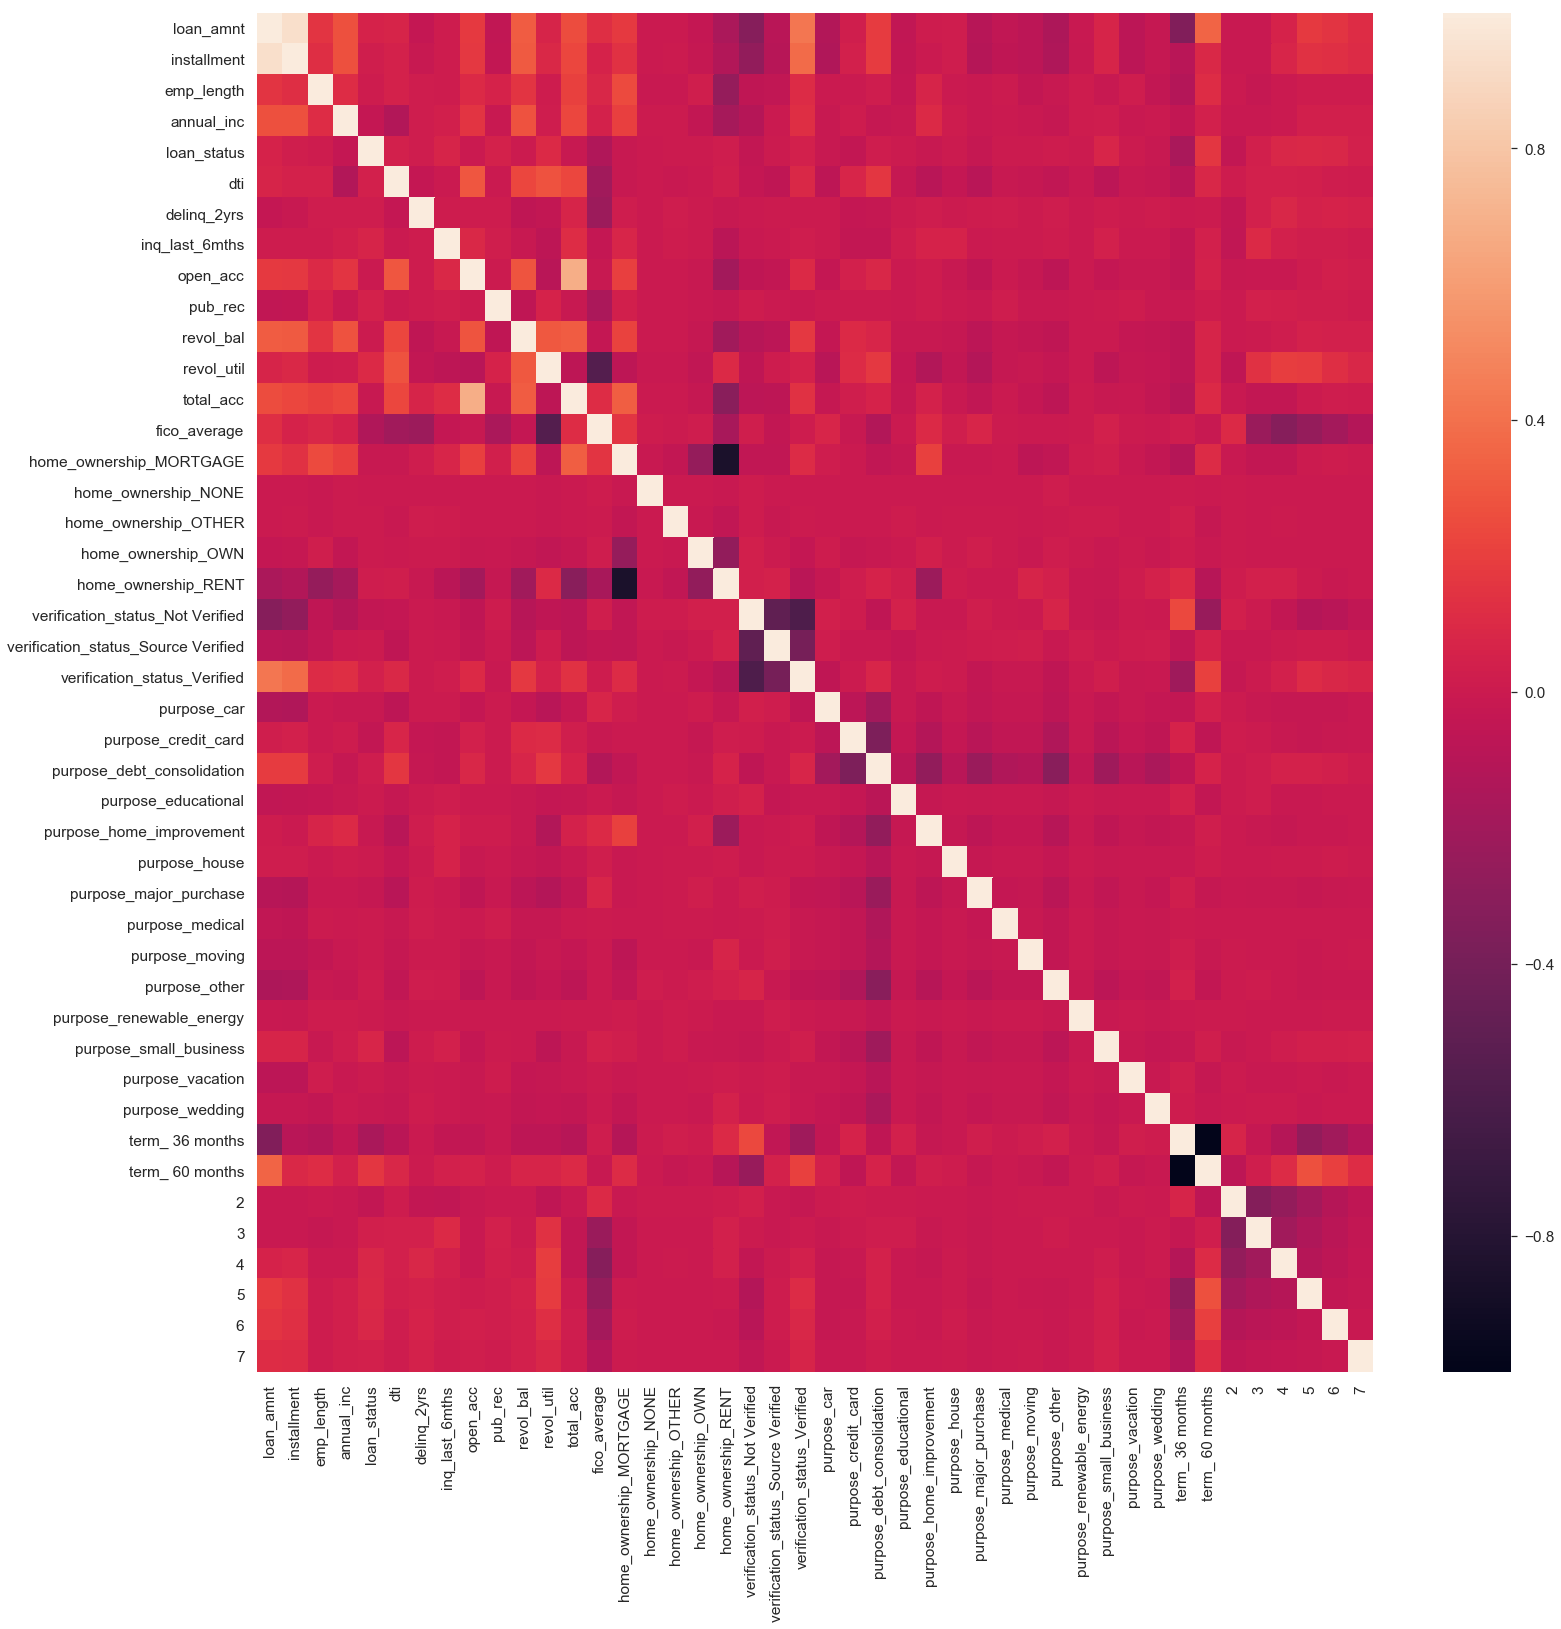

In [278]:
plt.figure(figsize=(25,25))
sns.heatmap(loan.corr());

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [188]:
from sklearn.model_selection import train_test_split
X=loan.drop("loan_status",1)
y=loan["loan_status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=11)

In [189]:
X_train.shape

(26686, 43)

In [190]:
X_test.shape

(11437, 43)

In [123]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

In [124]:
seed = 4

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn import model_selection

In [125]:
models2 = []

models2.append(('LR', LogisticRegression()))
models2.append(('DT', DecisionTreeClassifier()))
models2.append(('RF', RandomForestClassifier(n_estimators=10)))
models2.append(('KNN', KNeighborsClassifier()))
models2.append(('NB', BernoulliNB()))
#models2.append(('SVM', ))

def evaluation(modelx):
        
        fit = modelx.fit(X_train,y_train)
    
        y_pred= fit.predict(X_test)
    
        accuracy = accuracy_score(y_test,y_pred)
    
        return accuracy
    
    
results2 = []
names2 = []
for name,model in models2:
    a = evaluation(model)
    results2.append(a)
    names2.append(name)
    print('The accuracy of ',name,' is : ',a) 

results3 = []

for i in results2:
    results3.append([i])

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of  LR  is :  0.8563434467080528
The accuracy of  DT  is :  0.7658476873305937
The accuracy of  RF  is :  0.85214654192533
The accuracy of  KNN  is :  0.8397306986097753
The accuracy of  NB  is :  0.8169100288537203


### Accuracy, the proportion of correct classifications among all classifications, is very simple and very "intuitive" measure, yet it may be a poor measure for imbalanced data.

# Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
y_pred11=logreg.predict(X_test)

In [128]:
y_prob1 = logreg.predict_proba(X_test)

In [129]:
y_prob1

array([[0.90325747, 0.09674253],
       [0.84188342, 0.15811658],
       [0.86228825, 0.13771175],
       ...,
       [0.90296097, 0.09703903],
       [0.86636182, 0.13363818],
       [0.88706661, 0.11293339]])

In [130]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred11)
prec = precision_score(y_test, y_pred11)
rec = recall_score(y_test, y_pred11)
f1 = f1_score(y_test, y_pred11)
print(acc)
print(prec)
print(rec)
print(f1)


0.8563434467080528
0.0
0.0
0.0


Test data accuracy: 0.8563


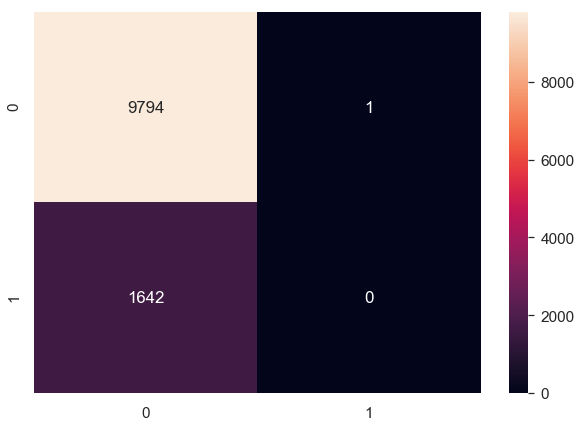

In [131]:
cm11 = confusion_matrix(y_test, y_pred11)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm11, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred11)))

In [132]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9795
           1       0.00      0.00      0.00      1642

   micro avg       0.86      0.86      0.86     11437
   macro avg       0.43      0.50      0.46     11437
weighted avg       0.73      0.86      0.79     11437



#### Here both precision and recall for Class 1 is 0 hence our model performed very poor. Inorder to rectify this we need to balance the data.

### Setting the threshold value and see how it works

In [133]:
df_test = pd.DataFrame(X_test)
df_test['Target'] = y_test
df_test['prob_0'] = y_prob1[:,0] 
df_test['prob_1'] = y_prob1[:,1]

In [134]:
df_test.head(20)

loan_amnt  installment  emp_length  annual_inc    dti  delinq_2yrs  \
1867     12000.0       396.92          10    120000.0   3.44          0.0   
31834    25000.0       832.50           2     77000.0  22.44          0.0   
22532    10000.0       193.34           0     72000.0  20.37          0.0   
5319     21000.0       666.82           5     86000.0   8.47          0.0   
29138     4000.0       131.65           0     21000.0  22.92          0.0   
27597    12250.0       381.11          10     60000.0  12.52          0.0   
29232     7000.0       242.53           2     60000.0   2.58          0.0   
11881    10000.0       349.70          10     90000.0  12.19          0.0   
8929     13000.0       410.32           3     78000.0  11.69          0.0   
35271    16000.0       215.34           0     66996.0  16.25          1.0   
20090    10800.0       342.84           2     55000.0   3.56          0.0   
25170     5500.0       185.93           2     54000.0  10.16          0.0   
19216     4500.0       136.48          10     23000.0  19.15          0.0   
17291    16000.0       516.28           6     66000.0  17.76          0.0   
36386    10000.0       328.64           5     39875.0  17.73          0.0   
22416     4200.0        89.22           0     20004.0   2.70          0.0   
29000     4000.0       125.13           2     41160.0  15.80          0.0   
8105      2100.0        68.75           3     39000.0  22.80          0.0   
25504    25000.0       869.21          10     69996.0  14.11          0.0   
10978    30000.0      1061.99           6    120000.0  12.17          1.0   

       inq_last_6mths  open_acc  pub_rec  revol_bal  ...  term_ 60 months  2  \
1867              0.0       5.0      0.0     4092.0  ...                0  1   
31834             1.0       6.0      0.0    44790.0  ...                0  1   
22532             0.0      14.0      0.0     9028.0  ...                0  0   
5319              1.0       8.0      0.0    11143.0  ...                0  0   
29138             1.0       8.0      0.0     2744.0  ...                0  1   
27597             0.0      12.0      0.0       36.0  ...                0  0   
29232             1.0       4.0      0.0     3971.0  ...                0  0   
11881             1.0      12.0      1.0    17133.0  ...                0  0   
8929              3.0       9.0      0.0     8256.0  ...                0  0   
35271             2.0      11.0      0.0     5636.0  ...                0  0   
20090             4.0      10.0      1.0     6365.0  ...                0  1   
25170             0.0      10.0      0.0     2352.0  ...                0  0   
19216             2.0      10.0      0.0     4606.0  ...                0  0   
17291             0.0      11.0      0.0    21170.0  ...                0  1   
36386             0.0      13.0      0.0     2895.0  ...                0  1   
22416             0.0       6.0      0.0      810.0  ...                1  1   
29000             1.0      11.0      0.0     3007.0  ...                0  0   
8105              0.0      10.0      0.0     1087.0  ...                0  1   
25504             2.0      11.0      0.0     9978.0  ...                0  0   
10978             1.0      10.0      0.0      568.0  ...                0  0   

       3  4  5  6  7  Target    prob_0    prob_1  
1867   0  0  0  0  0       0  0.903257  0.096743  
31834  0  0  0  0  0       0  0.841883  0.158117  
22532  0  0  0  0  0       0  0.862288  0.137712  
5319   0  0  0  0  0       0  0.865368  0.134632  
29138  0  0  0  0  0       0  0.860611  0.139389  
27597  0  0  0  0  0       0  0.886751  0.113249  
29232  0  1  0  0  0       0  0.873114  0.126886  
11881  0  1  0  0  0       0  0.884697  0.115303  
8929   0  0  0  0  0       1  0.886843  0.113157  
35271  0  0  1  0  0       0  0.750106  0.249894  
20090  0  0  0  0  0       0  0.868979  0.131021  
25170  1  0  0  0  0       0  0.876003  0.123997  
19216  0  0  0  0  0       0  0.872232  0.127

In [71]:
from yellowbrick.classifier import DiscriminationThreshold

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

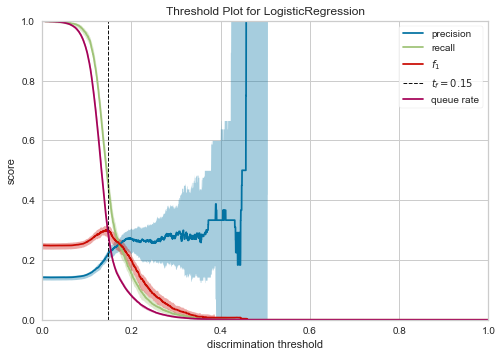

In [72]:

visualizer = DiscriminationThreshold(logreg)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [73]:
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = np.abs(tpr - fpr)
    j_ordered = sorted(zip(j_scores,thresholds, fpr, tpr))
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    res = {'fpr': j_ordered[-1][2], 'tpr': j_ordered[-1][3], 'threshold' : j_ordered[-1][1]}
    return res

In [74]:
predicted_proba_tr = logreg.predict_proba(X_train)

In [75]:
print(predicted_proba_tr[:5,1])

[0.14820615 0.11125235 0.13884172 0.06776505 0.15404171]


In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
threshold_df            =  pd.DataFrame()  
threshold_df['Actual']  = y_train
threshold_df.dropna(inplace = True)

In [78]:
threshold_values = np.arange(0.05,0.90,0.01)

cutoff_df        = pd.DataFrame()

for i in range(len(threshold_values)):
    
    threshold                   = threshold_values[i]
    threshold_df['Probability'] = predicted_proba_tr[:,1]
    threshold_df['pred']        = threshold_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
    cm                          = confusion_matrix(threshold_df['Actual'].astype('int'),\
                                                   threshold_df['pred'])
    precision                   = np.diag(cm) / np.sum(cm, axis = 0)
    recall                      = np.diag(cm) / np.sum(cm, axis = 1) 
    accuracy_ratio              = ((cm[0,0] + cm[1,1]) * 100) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    #auroc                       = 
    recall_positive             = recall[1]
    precision_positive          = precision[1]
    cutoff_df_ind               = pd.DataFrame({'Threshold': threshold, 'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
    print(cutoff_df_ind)
    print(cm)
    cutoff_df.append(cutoff_df_ind)  
print(cutoff_df.head())

   Threshold    Recall  Precision  Accuracy Ratio
0       0.05  0.996015    0.14153        14.73057
[[  182 22740]
 [   15  3749]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.06  0.994421    0.14192       15.116541
[[  291 22631]
 [   21  3743]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.07  0.991498    0.14265       15.828524
[[  492 22430]
 [   32  3732]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.08  0.984857   0.144062       17.252492
[[  897 22025]
 [   57  3707]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.09  0.971573   0.146374       19.680731
[[ 1595 21327]
 [  107  3657]]
   Threshold    Recall  Precision  Accuracy Ratio
0        0.1  0.948459   0.150576        23.80649
[[ 2783 20139]
 [  194  3570]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.11  0.904888   0.158677       30.986285
[[ 4863 18059]
 [  358  3406]]
   Threshold    Recall  Precision  Accuracy Ratio
0       0.12  0.827843   0.170515

C:\Users\pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


   Threshold  Recall  Precision  Accuracy Ratio
0       0.52     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.53     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.54     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.55     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.56     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.57     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.58     0.0        NaN       85.895226
[[22922     0]
 [ 3764     0]]
   Threshold  Recall  Precision  Accuracy Ratio
0       0.59     0.0        NaN       85.895226
[[22922     0]


{'fpr': 0.34255300584591225,
 'tpr': 0.5488841657810839,
 'threshold': 0.14063455870919295}

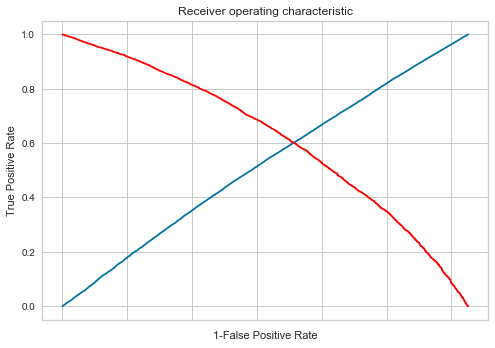

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, threshold_df['Probability'], \
                                         drop_intermediate = True )
get_youdens_j_cutoff(fpr, tpr, thresholds) 

For the threshold value of 0.15  ,the accuracy is 71.61433

In [80]:
df_test.head()

loan_amnt  installment  emp_length  annual_inc    dti  delinq_2yrs  \
1867     12000.0       396.92          10    120000.0   3.44          0.0   
31834    25000.0       832.50           2     77000.0  22.44          0.0   
22532    10000.0       193.34           0     72000.0  20.37          0.0   
5319     21000.0       666.82           5     86000.0   8.47          0.0   
29138     4000.0       131.65           0     21000.0  22.92          0.0   

       inq_last_6mths  open_acc  pub_rec  revol_bal  ...  term_ 60 months  2  \
1867              0.0       5.0      0.0     4092.0  ...                0  1   
31834             1.0       6.0      0.0    44790.0  ...                0  1   
22532             0.0      14.0      0.0     9028.0  ...                0  0   
5319              1.0       8.0      0.0    11143.0  ...                0  0   
29138             1.0       8.0      0.0     2744.0  ...                0  1   

       3  4  5  6  7  Target    prob_0    prob_1  
1867   0  0  0  0  0       0  0.903257  0.096743  
31834  0  0  0  0  0       0  0.841883  0.158117  
22532  0  0  0  0  0       0  0.862288  0.137712  
5319   0  0  0  0  0       0  0.865368  0.134632  
29138  0  0  0  0  0       0  0.860611  0.139389  

[5 rows x 46 columns]

In [81]:
def calculatedtarget(target):
    if target>= .15:
        a=1
    else:
        a=0
    return a   
    

In [82]:
df_test['Calculated_Target']=df_test['Target'].apply(lambda x: calculatedtarget(x))

In [83]:
df_test.head(20)

loan_amnt  installment  emp_length  annual_inc    dti  delinq_2yrs  \
1867     12000.0       396.92          10    120000.0   3.44          0.0   
31834    25000.0       832.50           2     77000.0  22.44          0.0   
22532    10000.0       193.34           0     72000.0  20.37          0.0   
5319     21000.0       666.82           5     86000.0   8.47          0.0   
29138     4000.0       131.65           0     21000.0  22.92          0.0   
27597    12250.0       381.11          10     60000.0  12.52          0.0   
29232     7000.0       242.53           2     60000.0   2.58          0.0   
11881    10000.0       349.70          10     90000.0  12.19          0.0   
8929     13000.0       410.32           3     78000.0  11.69          0.0   
35271    16000.0       215.34           0     66996.0  16.25          1.0   
20090    10800.0       342.84           2     55000.0   3.56          0.0   
25170     5500.0       185.93           2     54000.0  10.16          0.0   
19216     4500.0       136.48          10     23000.0  19.15          0.0   
17291    16000.0       516.28           6     66000.0  17.76          0.0   
36386    10000.0       328.64           5     39875.0  17.73          0.0   
22416     4200.0        89.22           0     20004.0   2.70          0.0   
29000     4000.0       125.13           2     41160.0  15.80          0.0   
8105      2100.0        68.75           3     39000.0  22.80          0.0   
25504    25000.0       869.21          10     69996.0  14.11          0.0   
10978    30000.0      1061.99           6    120000.0  12.17          1.0   

       inq_last_6mths  open_acc  pub_rec  revol_bal  ...  2  3  4  5  6  7  \
1867              0.0       5.0      0.0     4092.0  ...  1  0  0  0  0  0   
31834             1.0       6.0      0.0    44790.0  ...  1  0  0  0  0  0   
22532             0.0      14.0      0.0     9028.0  ...  0  0  0  0  0  0   
5319              1.0       8.0      0.0    11143.0  ...  0  0  0  0  0  0   
29138             1.0       8.0      0.0     2744.0  ...  1  0  0  0  0  0   
27597             0.0      12.0      0.0       36.0  ...  0  0  0  0  0  0   
29232             1.0       4.0      0.0     3971.0  ...  0  0  1  0  0  0   
11881             1.0      12.0      1.0    17133.0  ...  0  0  1  0  0  0   
8929              3.0       9.0      0.0     8256.0  ...  0  0  0  0  0  0   
35271             2.0      11.0      0.0     5636.0  ...  0  0  0  1  0  0   
20090             4.0      10.0      1.0     6365.0  ...  1  0  0  0  0  0   
25170             0.0      10.0      0.0     2352.0  ...  0  1  0  0  0  0   
19216             2.0      10.0      0.0     4606.0  ...  0  0  0  0  0  0   
17291             0.0      11.0      0.0    21170.0  ...  1  0  0  0  0  0   
36386             0.0      13.0      0.0     2895.0  ...  1  0  0  0  0  0   
22416             0.0       6.0      0.0      810.0  ...  1  0  0  0  0  0   
29000             1.0      11.0      0.0     3007.0  ...  0  0  0  0  0  0   
8105              0.0      10.0      0.0     1087.0  ...  1  0  0  0  0  0   
25504             2.0      11.0      0.0     9978.0  ...  0  0  1  0  0  0   
10978             1.0      10.0      0.0      568.0  ...  0  0  1  0  0  0   

       Target    prob_0    prob_1  Calculated_Target  
1867        0  0.903257  0.096743                  0  
31834       0  0.841883  0.158117                  0  
22532       0  0.862288  0.137712                  0  
5319        0  0.865368  0.134632                  0  
29138       0  0.860611  0.139389                  0  
27597       0  0.886751  0.113249                  0  
29232       0  0.873114  0.126886                  0  
11881       0  0.884697  0.115303                  0  
8929        1  0.886843  0.113157                  1  
35271       0  0.750106  0.249894                  0  
20090       0  0.868979  0.131021                  0  
25170       0  0.876003  0.123997                  0  
19216       0  0.872232  0.127768  

In [84]:
print(classification_report(df_test['Target'],df_test['Calculated_Target']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9795
           1       1.00      1.00      1.00      1642

   micro avg       1.00      1.00      1.00     11437
   macro avg       1.00      1.00      1.00     11437
weighted avg       1.00      1.00      1.00     11437



In [85]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred11)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [86]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred11))

0.8563434467080528
0.8563434467080528


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [87]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred11))

0.0
0.0


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [88]:
print(TN / float(TN + FP))

0.9998979070954569


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [89]:
print(FP / float(TN + FP))

0.00010209290454313425


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [90]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred11))

0.0
0.0


# Cross Validation

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.8405455  0.83661159 0.84316811 0.83766063 0.8405455  0.84264359
 0.84286464 0.83967463 0.84072422 0.84203621]


In [46]:
print(scores.mean())

0.8406474622279261


In [47]:
print(scores.std())

0.0020824300840459687


### Cross validation score is 0.84 and Standard deviation is 0.002 hence the values are distributed within the range of 84.

In [48]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.764394173589866, 0.6833142904783039, 0.8203182814788681, 0.788946384454453, 0.8406474622279261, 0.8258795706069687, 0.8496973276810467, 0.8432444554833948, 0.8537892963131043, 0.8498284649189214, 0.855363197621738, 0.8527400884007685, 0.8565959535976516, 0.855415567179046, 0.8573828457658429, 0.8568320088701178, 0.8578024559889791, 0.857015591351104, 0.8576450720463891, 0.8574090649582946, 0.8579073602602177, 0.857671304998583, 0.8580122645350668, 0.857854880599698, 0.8580122645386774, 0.8579073602638283, 0.8580909565045566, 0.857959819281124, 0.858038497487261, 0.8580647235559733]


In [49]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.8580909565045566


Text(0, 0.5, 'Cross-validated accuracy')

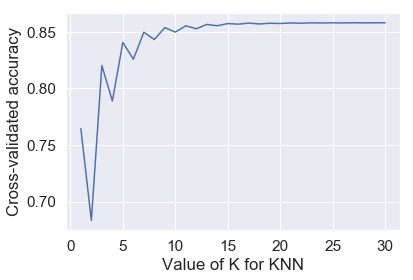

In [50]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

#### we chose the knn value as 10

### comparing the best knn model

In [51]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8498284649189214


In [52]:
knn_predict=knn.predict()

TypeError: predict() missing 1 required positional argument: 'X'

### After applying the optimum knn value score increases from 0.84 0.849

In [53]:
cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()

0.5407992214039853

### Area under the curve for cross validation is 0.54

### We can't come to conclusion with accuracy rate ,our model performed poor while seeing the values of precision and f1 score. So we need to balance this imbalanced dataset

# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

In [17]:
from sklearn.model_selection import train_test_split
X=loan.drop("loan_status",1)
y=loan["loan_status"]

In [18]:
# Implementing Oversampling for Handling Imbalanced 
ros = SMOTE()
X_res,y_res=ros.fit_sample(X,y)

In [19]:
X_res.shape,y_res.shape

((65434, 43), (65434,))

In [20]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 32717, 1: 5406})
Resampled dataset shape Counter({0: 32717, 1: 32717})


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=.30,random_state=11)

In [23]:
X_train.shape

(45803, 43)

In [24]:
X_test.shape

(19631, 43)

In [25]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred=logreg.predict(X_test)

In [27]:
y_prob12 = logreg.predict_proba(X_test)[:,1]

In [28]:
y_prob12

#2 because probability of predicting as 0 and 1

array([0.4434414 , 0.66094241, 0.38605523, ..., 0.45072296, 0.55437796,
       0.57053687])

In [29]:
y_prob12.shape

(19631,)

In [30]:
print("Train Score: ",logreg.score(X_train, y_train))
print("Test Score: ",logreg.score(X_test,y_test))

Train Score:  0.6301333973757177
Test Score:  0.6335897305282462


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


Test data accuracy: 0.6336


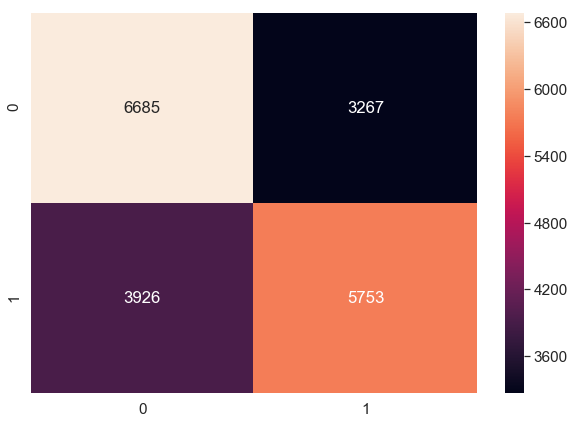

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      9952
           1       0.64      0.59      0.62      9679

   micro avg       0.63      0.63      0.63     19631
   macro avg       0.63      0.63      0.63     19631
weighted avg       0.63      0.63      0.63     19631



#### This model predicted 1 with 0.64 precision and 0 with 0.64 precision and recall for 1 is 0.67 and for 0 is 0.59 which shows the precision rate and recall improved after applying SMOTE.

In [34]:
results

Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.63359   0.637805  0.59438  0.615327

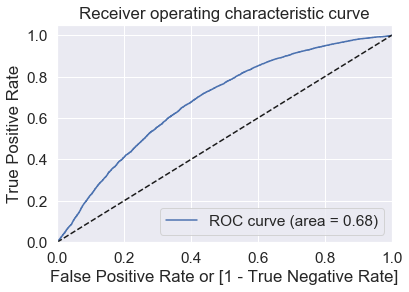

In [35]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob12,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob12)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
dtree1 = DecisionTreeClassifier()

In [38]:
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
predictions1 = dtree1.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print("Train Score: ",dtree1.score(X_train, y_train))
print("Test Score: ",dtree1.score(X_test,y_test))

Train Score:  1.0
Test Score:  0.8516631857775967


#### Train score is 1.0 hence the model is overfitted.

In [42]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      9952
           1       0.84      0.86      0.85      9679

   micro avg       0.85      0.85      0.85     19631
   macro avg       0.85      0.85      0.85     19631
weighted avg       0.85      0.85      0.85     19631



Test data accuracy: 0.8517


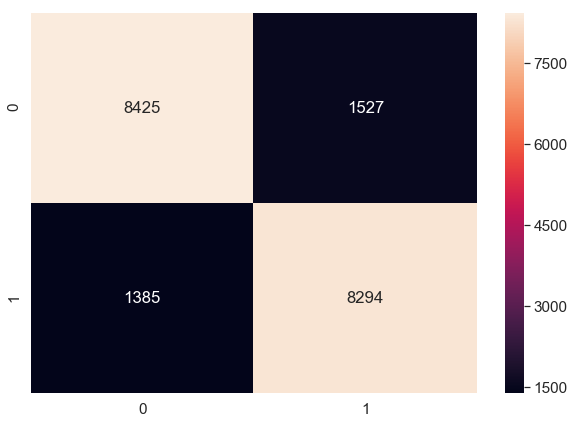

In [43]:
cm = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, predictions1)))

In [44]:
# Predicting Test Set
acc = accuracy_score(y_test, predictions1)
prec = precision_score(y_test, predictions1)
rec = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [45]:
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.633590   0.637805  0.594380  0.615327
1        Decision Tree  0.851663   0.844517  0.856907  0.850667

In [46]:
y_prob16 = dtree1.predict_proba(X_test)[:,1]

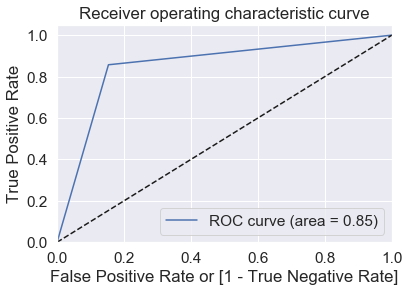

In [47]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob16,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob16)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Randomforest After oversampling

In [48]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 11,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

#

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [49]:
# Predicting Test Set
y_pred2 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.9081


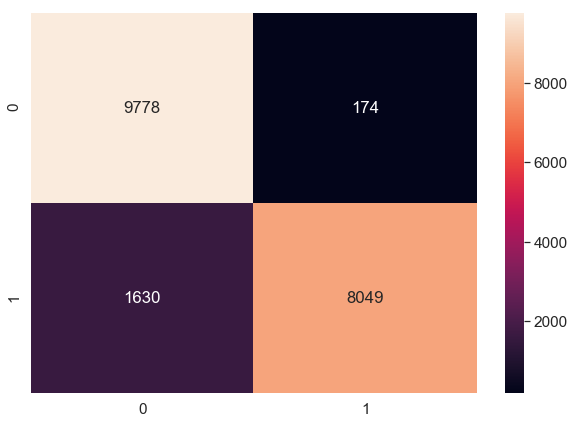

In [50]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred2)))

In [51]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      9952
           1       0.98      0.83      0.90      9679

   micro avg       0.91      0.91      0.91     19631
   macro avg       0.92      0.91      0.91     19631
weighted avg       0.92      0.91      0.91     19631



In [52]:
print("Train Score: ",classifier.score(X_train, y_train))
print("Test Score: ",classifier.score(X_test,y_test))

Train Score:  0.9888216929022117
Test Score:  0.9081045285517804


### The random forest model has good accuracy of 90% with recall values for 1 as 0.83 precision and 0 as 0.98 which shows great improvement in the model.

In [53]:
y_prob13 = classifier.predict_proba(X_test)[:,1]

In [54]:
y_prob13

array([0. , 0.9, 0. , ..., 0.2, 0.9, 1. ])

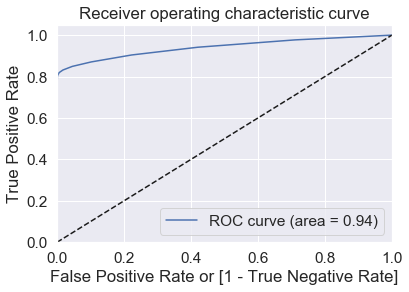

In [55]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob13,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob13)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Naive bayes

In [56]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
# Predicting Test Set
y_pred4 = model.predict(X_test)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

In [58]:
model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.5922


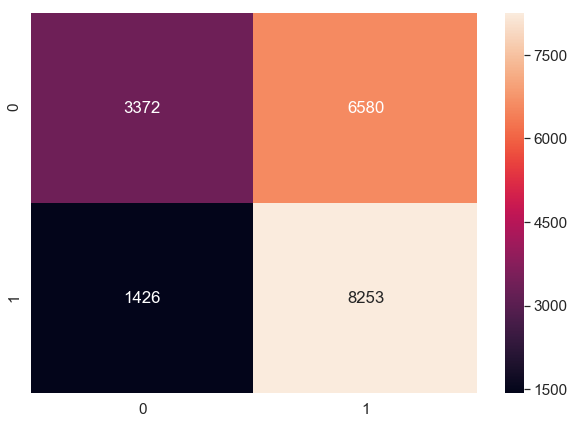

In [59]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred4)))

In [60]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.70      0.34      0.46      9952
           1       0.56      0.85      0.67      9679

   micro avg       0.59      0.59      0.59     19631
   macro avg       0.63      0.60      0.57     19631
weighted avg       0.63      0.59      0.56     19631



In [61]:
print("Train Score: ",model.score(X_train, y_train))
print("Test Score: ",model.score(X_test,y_test))

Train Score:  0.5981922581490295
Test Score:  0.5921756405684886


In [62]:
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.633590   0.637805  0.594380  0.615327
1        Decision Tree  0.851663   0.844517  0.856907  0.850667
2        Random Forest  0.908105   0.978840  0.831594  0.899229
3          Naive Bayes  0.592176   0.556395  0.852671  0.673384

In [63]:
y_prob14 = model.predict_proba(X_test)[:,1]

In [64]:
y_prob14

array([0.73627653, 0.83441146, 0.75702979, ..., 0.6890626 , 0.08855402,
       0.55389606])

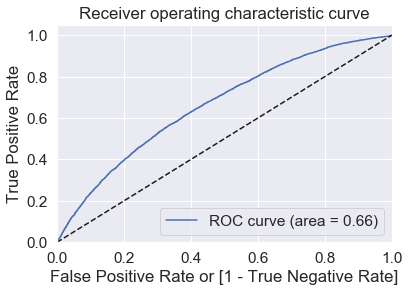

In [65]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob14,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob14)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Bagging

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
# Bagging

bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [68]:
bg.score(X_train, y_train)

0.9643691461257996

In [69]:
bg.score(X_test,y_test)

0.9041821608680148

In [70]:
bg_pred = bg.predict(X_test)

Test data accuracy: 0.9042


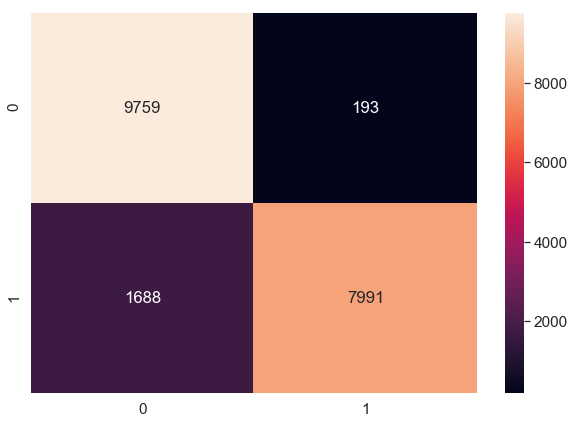

In [71]:
cm6 = confusion_matrix(y_test, bg_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm6, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, bg_pred)))

In [72]:
print(classification_report(y_test,bg_pred))

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9952
           1       0.98      0.83      0.89      9679

   micro avg       0.90      0.90      0.90     19631
   macro avg       0.91      0.90      0.90     19631
weighted avg       0.91      0.90      0.90     19631



In [73]:
# Predicting Test Set

acc = accuracy_score(y_test, bg_pred)
prec = precision_score(y_test, bg_pred)
rec = recall_score(y_test, bg_pred)
f1 = f1_score(y_test, bg_pred)
model_results = pd.DataFrame([['Bagging Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.633590   0.637805  0.594380  0.615327
1        Decision Tree  0.851663   0.844517  0.856907  0.850667
2        Random Forest  0.908105   0.978840  0.831594  0.899229
3          Naive Bayes  0.592176   0.556395  0.852671  0.673384
4   Bagging Classifier  0.904182   0.976417  0.825602  0.894699

# Boosting

In [74]:
#Boosting
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.01)
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=10, random_state=None)

In [75]:
ad.score(X_train, y_train)

1.0

### Our boosting model train score is 1.0 hence it is overfitted

In [76]:
ad.score(X_test,y_test)

0.8513575467373032

In [77]:
ad_pred = ad.predict(X_test)

In [78]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      9952
           1       0.84      0.86      0.85      9679

   micro avg       0.85      0.85      0.85     19631
   macro avg       0.85      0.85      0.85     19631
weighted avg       0.85      0.85      0.85     19631



Test data accuracy: 0.8514


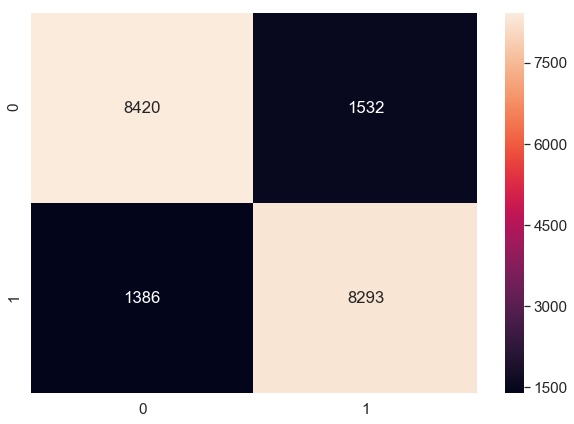

In [79]:
cm7 = confusion_matrix(y_test, ad_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm7, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, ad_pred)))

In [80]:
acc = accuracy_score(y_test, ad_pred)
prec = precision_score(y_test, ad_pred)
rec = recall_score(y_test, ad_pred)
f1 = f1_score(y_test, ad_pred)


In [81]:
model_results = pd.DataFrame([['Adaboost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.633590   0.637805  0.594380  0.615327
1        Decision Tree  0.851663   0.844517  0.856907  0.850667
2        Random Forest  0.908105   0.978840  0.831594  0.899229
3          Naive Bayes  0.592176   0.556395  0.852671  0.673384
4   Bagging Classifier  0.904182   0.976417  0.825602  0.894699
5             Adaboost  0.851358   0.844071  0.856803  0.850390

<b>Is boosting more vulnerable to overfitting than bagging?</b>
<p style="padding:5px">We need to understand that bagging decreases variance, while boosting decreases bias.

Also, to be noted that under-fitting means that the model has low variance and high bias and vice versa for overfitting.

So, boosting is more vulnerable to overfitting than bagging.</p>

# Variable importance plot

##### Variable importance plot for random forest

Text(0.5, 0, 'Relative Importance')

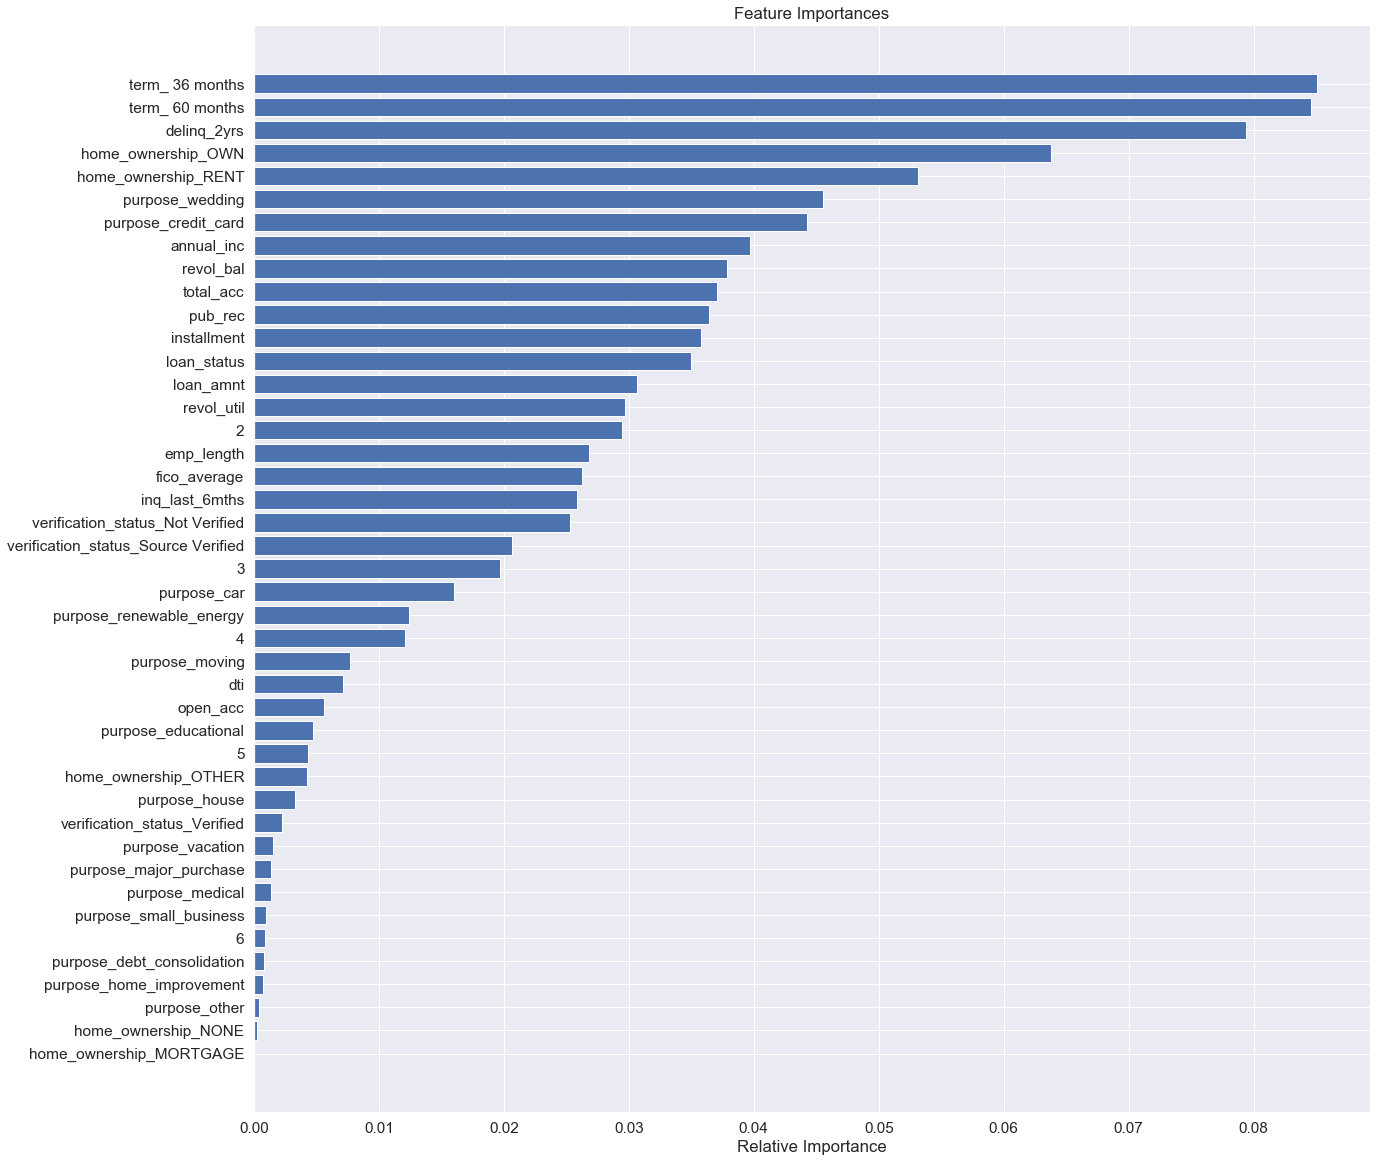

In [82]:
features=loan.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [83]:
varImp_df   = pd.DataFrame({'Feature_names' :features[indices],\
                            'Importances' : importances[indices]})
varImp_df.sort_values('Importances', ascending = False) 

Feature_names   Importances
42                      term_ 36 months  8.505256e-02
41                      term_ 60 months  8.457266e-02
40                          delinq_2yrs  7.935375e-02
39                   home_ownership_OWN  6.382138e-02
38                  home_ownership_RENT  5.310759e-02
37                      purpose_wedding  4.554215e-02
36                  purpose_credit_card  4.425131e-02
35                           annual_inc  3.965644e-02
34                            revol_bal  3.788435e-02
33                            total_acc  3.706448e-02
32                              pub_rec  3.642673e-02
31                          installment  3.573860e-02
30                          loan_status  3.500008e-02
29                            loan_amnt  3.061526e-02
28                           revol_util  2.966938e-02
27                                    2  2.943091e-02
26                           emp_length  2.680094e-02
25                         fico_average  2.621811e-02
24                       inq_last_6mths  2.582855e-02
23     verification_status_Not Verified  2.531718e-02
22  verification_status_Source Verified  2.068308e-02
21                                    3  1.971113e-02
20                          purpose_car  1.603344e-02
19             purpose_renewable_energy  1.243521e-02
18                                    4  1.211507e-02
17                       purpose_moving  7.656000e-03
16                                  dti  7.098817e-03
15                             open_acc  5.606302e-03
14                  purpose_educational  4.760940e-03
13                                    5  4.348010e-03
12                 home_ownership_OTHER  4.283496e-03
11                        purpose_house  3.279300e-03
10         verification_status_Verified  2.282037e-03
9                      purpose_vacation  1.519750e-03
8                purpose_major_purchase  1.390006e-03
7                       purpose_medical  1.342743e-03
6                purpose_small_business  9.827104e-04
5                                     6  8.787709e-04
4            purpose_debt_consolidation  8.194338e-04
3              purpose_home_improvement  7.618132e-04
2                         purpose_other  4.021410e-04
1                   home_ownership_NONE  2.570241e-04
0               home_ownership_MORTGAGE  3.824008e-07

##### variable importance for decision tree model

Text(0.5, 0, 'Relative Importance')

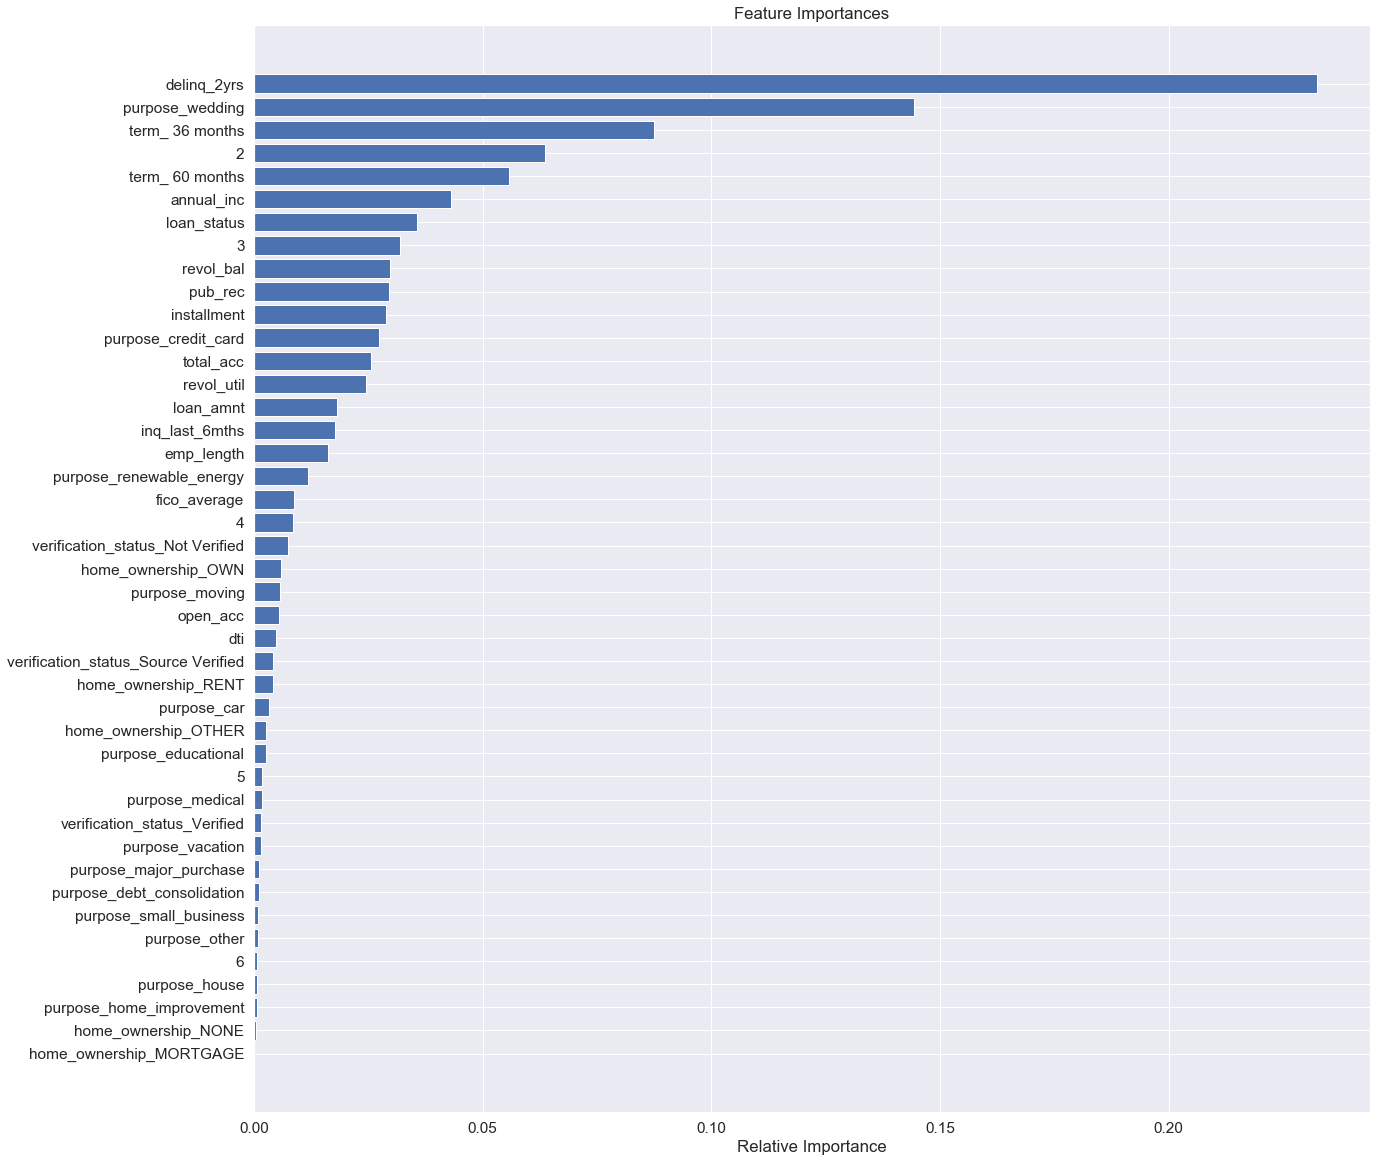

In [84]:
features=loan.columns
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [85]:
varImp_df1   = pd.DataFrame({'Feature_names' :features[indices],\
                            'Importances' : importances[indices]})
varImp_df1.sort_values('Importances', ascending = False) 

Feature_names  Importances
42                          delinq_2yrs     0.232411
41                      purpose_wedding     0.144258
40                      term_ 36 months     0.087438
39                                    2     0.063642
38                      term_ 60 months     0.055702
37                           annual_inc     0.043152
36                          loan_status     0.035598
35                                    3     0.031914
34                            revol_bal     0.029846
33                              pub_rec     0.029503
32                          installment     0.028854
31                  purpose_credit_card     0.027373
30                            total_acc     0.025512
29                           revol_util     0.024522
28                            loan_amnt     0.018101
27                       inq_last_6mths     0.017614
26                           emp_length     0.016131
25             purpose_renewable_energy     0.011915
24                         fico_average     0.008739
23                                    4     0.008625
22     verification_status_Not Verified     0.007340
21                   home_ownership_OWN     0.005930
20                       purpose_moving     0.005715
19                             open_acc     0.005459
18                                  dti     0.004735
17  verification_status_Source Verified     0.004208
16                  home_ownership_RENT     0.004114
15                          purpose_car     0.003272
14                 home_ownership_OTHER     0.002655
13                  purpose_educational     0.002602
12                                    5     0.001763
11                      purpose_medical     0.001758
10         verification_status_Verified     0.001574
9                      purpose_vacation     0.001496
8                purpose_major_purchase     0.001195
7            purpose_debt_consolidation     0.001090
6                purpose_small_business     0.000896
5                         purpose_other     0.000843
4                                     6     0.000762
3                         purpose_house     0.000704
2              purpose_home_improvement     0.000642
1                   home_ownership_NONE     0.000396
0               home_ownership_MORTGAGE     0.000000

### Hyper parameter tuning

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [87]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 10

# Instantiate the grid search model
classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarn

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [88]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\util

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.806128      0.130225         0.009513        0.003154   
1        0.702819      0.042825         0.008801        0.002993   
2        0.715220      0.091791         0.008801        0.001600   
3        0.674676      0.050170         0.008000        0.001788   
4        0.953226      0.025617         0.008400        0.001200   
5        0.971082      0.031418         0.010401        0.003666   
6        0.883222      0.017233         0.008800        0.001600   
7        0.912681      0.094905         0.010802        0.001832   
8        0.509214      0.035466         0.008000        0.000001   
9        0.518011      0.048771         0.006802        0.001833   
10       0.502229      0.017713         0.007200        0.001600   
11       0.532014      0.059494         0.008001        0.001789   
12       0.718419      0.023132         0.009201        0.001834   
13       0.717572      0.035286         0.010153        0.001898   
14       0.743043      0.107757         0.010400        0.002653   
15       0.700819      0.024903         0.010001        0.002001   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  ...  split2_train_score  split3_train_score  \
0            0.819472  ...            0.858401            0.842414   
1            0.835844  ...            0.846465            0.833851   
2            0.824274  ...            0.839940            0.838557   
3            0.852216  ...            0.870603            0.837611   
4            0.884523  ...            0.896536            0.899811   
5          

In [89]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8947448857061765
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [90]:
# model with optimal hyperparameters
clf_gini = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf_gini.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
clf_gini.score(X_train,y_train)

0.9002903739929699

In [92]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8951658091793592

In [93]:
# Predicting Test Set
y_predHP = clf_gini.predict(X_test)
acc = accuracy_score(y_test, y_predHP)
prec = precision_score(y_test, y_predHP)
rec = recall_score(y_test, y_predHP)
f1 = f1_score(y_test, y_predHP)

model_results = pd.DataFrame([['Random Forest-HYPERPARAMETER TUNING', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.8952


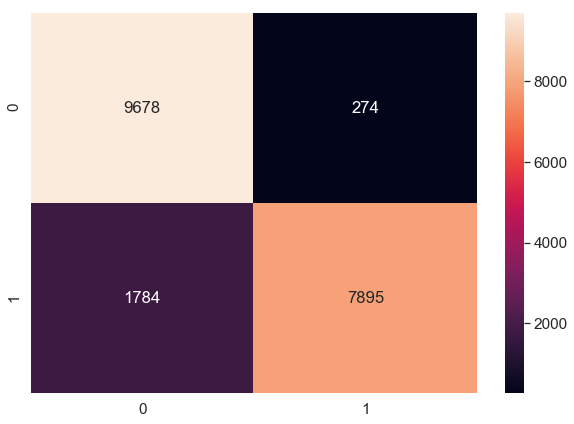

In [94]:
cm = confusion_matrix(y_test, y_predHP)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_predHP)))

In [95]:
print(classification_report(y_test,y_predHP))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      9952
           1       0.97      0.82      0.88      9679

   micro avg       0.90      0.90      0.90     19631
   macro avg       0.91      0.89      0.89     19631
weighted avg       0.90      0.90      0.89     19631



In [96]:
results

Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.633590   0.637805  0.594380   
1                        Decision Tree  0.851663   0.844517  0.856907   
2                        Random Forest  0.908105   0.978840  0.831594   
3                          Naive Bayes  0.592176   0.556395  0.852671   
4                   Bagging Classifier  0.904182   0.976417  0.825602   
5                             Adaboost  0.851358   0.844071  0.856803   
6  Random Forest-HYPERPARAMETER TUNING  0.895166   0.966459  0.815683   

   F1 Score  
0  0.615327  
1  0.850667  
2  0.899229  
3  0.673384  
4  0.894699  
5  0.850390  
6  0.884693

In [97]:
estimator_limited = clf_gini.estimators_[5]
estimator_limited

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=316372359, splitter='best')

In [98]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X.columns,
                rounded = True, proportion = False, precision = 2, filled = True)

In [99]:
!dot -Tpng tree_limited.dot -o tree_limited.png

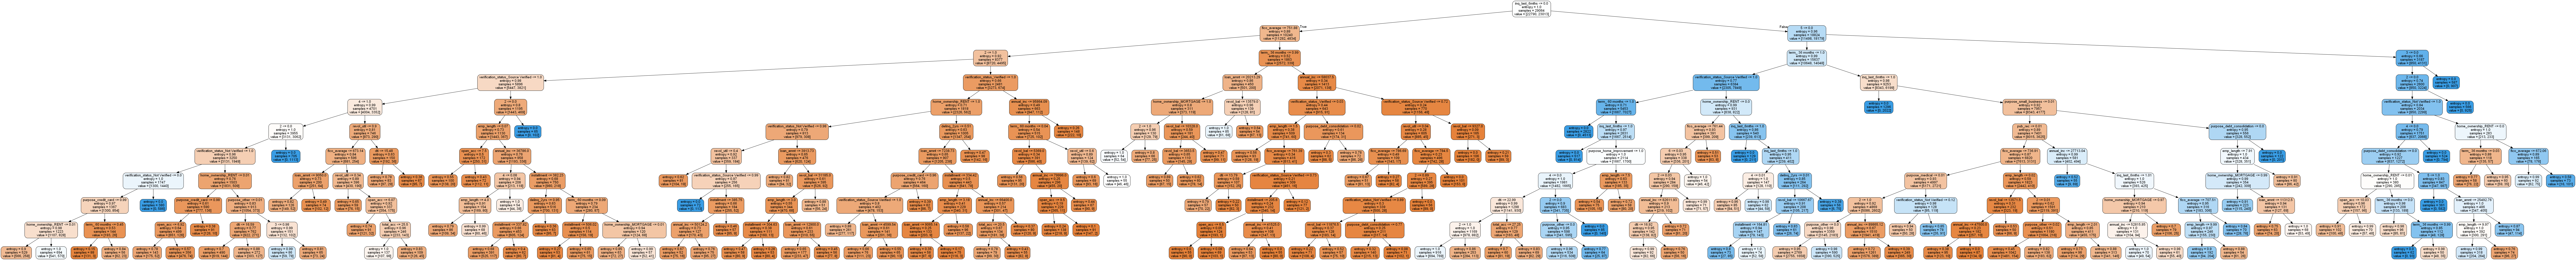

In [100]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [101]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(loan.columns[1:])
features

['installment',
 'emp_length',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'fico_average',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'term_ 36 months',
 'term_ 60 months',
 2,
 3,
 4,
 5,
 6,
 7]

In [103]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(loan.drop('loan_status',axis=1))
features


['loan_amnt',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'fico_average',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'term_ 36 months',
 'term_ 60 months',
 2,
 3,
 4,
 5,
 6,
 7]

In [104]:
import pydotplus, graphviz

In [105]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited1.dot', feature_names = features,
                rounded = True, proportion = False, precision = 2, filled = True)



In [106]:
!dot -Tpng tree_limited1.dot -o tree_limited1.png


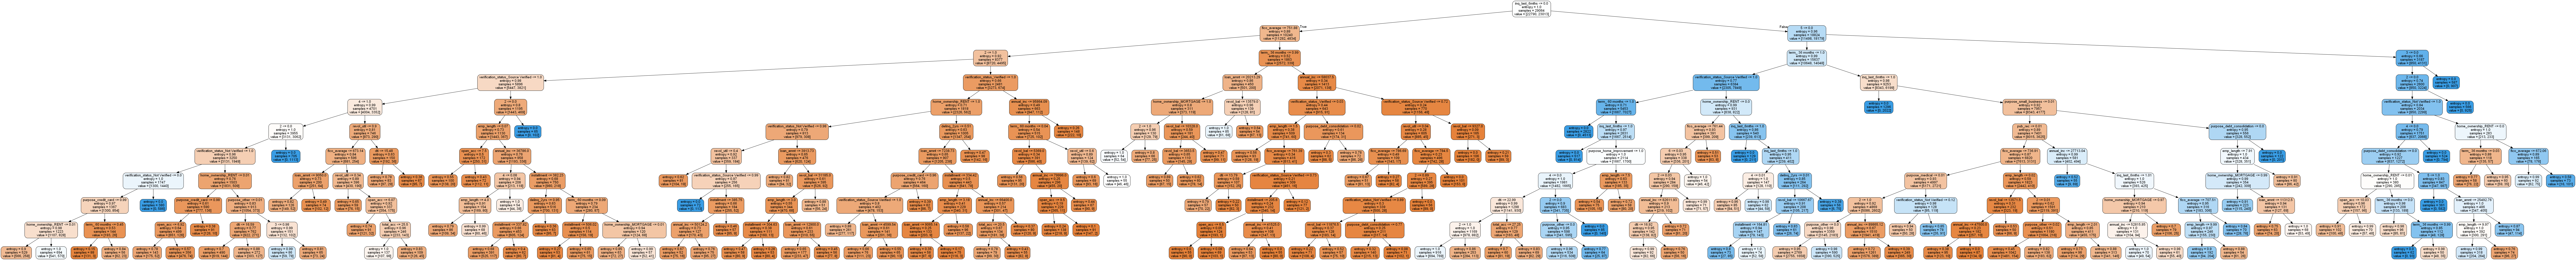

In [107]:

from IPython.display import Image
Image(filename = 'tree_limited1.png')

In [102]:
results

Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.633590   0.637805  0.594380   
1                        Decision Tree  0.851663   0.844517  0.856907   
2                        Random Forest  0.908105   0.978840  0.831594   
3                          Naive Bayes  0.592176   0.556395  0.852671   
4                   Bagging Classifier  0.904182   0.976417  0.825602   
5                             Adaboost  0.851358   0.844071  0.856803   
6  Random Forest-HYPERPARAMETER TUNING  0.895166   0.966459  0.815683   

   F1 Score  
0  0.615327  
1  0.850667  
2  0.899229  
3  0.673384  
4  0.894699  
5  0.850390  
6  0.884693

After Hyperparameter tuning the best accuracy is 0.89 and for which the recall value is 0.81 which is pretty good.

Finally We can able to infer that Random forest model has great accuracy compared to other models.

Inorder to get the perfect model we can use validation data for hyperparameter tuning.  

Splitting the original dataset into Train, Validation, Test data can make our model perfect as we won't use test data for hyperparameter tuning and it will be useful whenever new data added to the test dataset.

### Conclusion: 
Previously lenders and ﬁnancial institutes employedhighly professional individuals to evaluate a candidate’sworthiness before approving or rejecting a loan. However,recently these institutes have started employing variousmodels for loan evaluation in order to decide whether toreject or approve a loan to a borrower based on their creditscore and ability to repay. 

The ever-increasing demand for loan lending has madecredit scoring as one of the most signiﬁcant tools in theﬁnancial world.

The guideline to help the bank identify and take action on customers with high probability of defaulting to improve their bottom line. The challenge is to help the bank to improve its credit card services for the mutual benefit of customers
and the business itself. 

When it comes to default prediction, we have a model that is able to predict the defaults of customers with
high enough certainty that the lending club can utilize it in their functions. Assuming that the lending club continues to
receive customers that are represented in our dataset we could implement our model in the banks
preliminary screening process and it would bring financial gain to them. However, our solution is not
viable to be used as a standalone system in its current form since it only considers part of the banks actions.
Many factors that were not covered in this case study should be taken into consideration when taking any
business action. 